In [1]:
import zarr

import xarray as xr

# from rechunker import rechunk

from pathlib import Path

print(zarr.__version__)


3.0.7


In [7]:
# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND1/DYAMOND1_history_to_hp7.zarr"

# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND1/15min/DYAMOND1_diag_15min_to_hp10.zarr"

# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND3/6hr/DYAMOND3_hist_6hr_to_hp6.zarr"

# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND3/3hr/DYAMOND3_diag_3hr_to_hp6.zarr"

# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND3/30min/DYAMOND3_diag_30min_to_hp6.zarr"

# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_15min_to_hp6.zarr"
# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_15min_to_hp7.zarr"

# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/3hr/DYAMOND2_hist_3hr_to_hp7.zarr"

# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND1/3hr/DYAMOND1_hist_3hr_to_hp6.zarr"

# RECHUNKED
# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/TEST_RECHUNK.zarr"
# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_15min_to_hp2_RECHUNK.zarr"
# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_15min_to_hp3_RECHUNK.zarr"
# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_15min_to_hp4_RECHUNK.zarr"

# RECHUNKED + TIME-Correction
# zfil = "/glade/campaign/cgd/cas/brianpm/hack25/DYAMOND2_diag_15min_to_hp1.zarr"
# zfil = '/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_PT15M_to_hp3.zarr'
# zfil = '/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_PT15M_to_hp4.zarr'
# zfil = '/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_PT15M_to_hp5.zarr'
# zfil = '/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_PT15M_to_hp2.zarr'
# zfil = '/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_PT15M_to_hp1.zarr'
# zfil = '/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_PT15M_to_hp6.zarr'
# zfil = '/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/15min/DYAMOND2_diag_PT15M_to_hp7.zarr'

zfil = '/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND1/15min/DYAMOND1_diag_PT15M_to_hp6.zarr'


# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND1/15min/DYAMOND1_diag_15min_to_hp1.zarr"

ds = xr.open_dataset(zfil, decode_times=True)


In [8]:
# Add after successful completion, before the final print statements
print("\nVerifying metadata preservation...")
ds_verify = xr.open_zarr(zfil)
print("\nComparing metadata between original and rechunked datasets:")

for var in ds_verify.data_vars:
    new_attrs = ds_verify[var].attrs
    print(f"{var}: {new_attrs}")


Verifying metadata preservation...

Comparing metadata between original and rechunked datasets:
dewpoint_250hPa: {'units': 'K', 'long_name': 'Dewpoint temperature vertically interpolated to 250 hPa', 'healpix_nside': 64, 'healpix_dim_name': 'cell', 'original_mpas_spatial_dim': 'nCells'}
temperature_200hPa: {'units': 'K', 'long_name': 'Temperature vertically interpolated to 200 hPa', 'healpix_nside': 64, 'healpix_dim_name': 'cell', 'original_mpas_spatial_dim': 'nCells'}
uzonal_300hPa: {'units': 'm/s', 'healpix_nside': 64, 'healpix_dim_name': 'cell', 'original_mpas_spatial_dim': 'nCells'}
omega_700hPa: {'units': 'Pa s^{-1}', 'long_name': 'Pressure velocity vertically interpolated to 700 hPa', 'healpix_nside': 64, 'healpix_dim_name': 'cell', 'original_mpas_spatial_dim': 'nCells'}
cin: {'units': 'J kg^{-1}', 'long_name': 'Convective inhibition', 'healpix_nside': 64, 'healpix_dim_name': 'cell', 'original_mpas_spatial_dim': 'nCells'}
w_925hPa: {'units': 'm s^{-1}', 'long_name': 'Vertical ve

In [9]:
len(ds['cell'])//2

24576

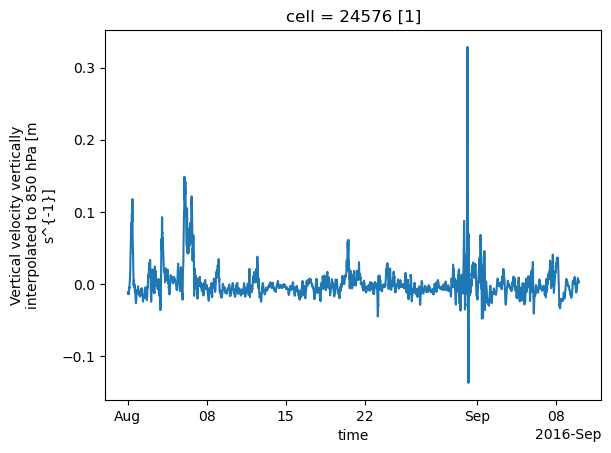

In [11]:
ds['w_850hPa'].isel(time=slice(1,None), cell=len(ds['cell'])//2).plot()

In [37]:
ds['lh'].encoding

{'chunks': (1, 3145728),
 'preferred_chunks': {'time': 1, 'cell': 3145728},
 'compressors': (Blosc(cname='zstd', clevel=3, shuffle=BITSHUFFLE, blocksize=0),),
 'filters': (),
 'shards': None,
 '_FillValue': np.float32(nan),
 'dtype': dtype('float32')}

In [39]:
3145728 / 16

196608.0

In [2]:
src_loc = Path("/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND3/3hr")
src_zarr = sorted(src_loc.glob("DYAMOND_diag_3h.3.75km.*_to_hp1.zarr"))
print(f"Found {len(src_zarr)} source Zarr archives")

ds = xr.open_mfdataset(src_zarr, engine='zarr')

Found 36 source Zarr archives


/glade/derecho/scratch/brianpm/tmp/ipykernel_72658/521181302.py:5: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_mfdataset(src_zarr, engine='zarr')
/glade/derecho/scratch/brianpm/tmp/ipykernel_72658/521181302.py:5: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata(

In [3]:
target_chunks = {"time": 36, "cell": 48}
max_mem = "1GB"
target_store = "/glade/campaign/cgd/cas/brianpm/hack25/rechunk/B_group_rechunked.zarr"
temp_store = "/glade/campaign/cgd/cas/brianpm/hack25/rechunk/group_rechunked-tmp.zarr"
array_plan = rechunk(
    ds, target_chunks, max_mem, target_store, temp_store=temp_store
)
array_plan

TypeError: extract_zarr_variable_encoding() missing 1 required keyword-only argument: 'zarr_format'

In [ ]:
# zfil = "/glade/campaign/cgd/cas/brianpm/hack25/DYAMOND2_history_3h_to_hp10.zarr"
# zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/parallel_proc/DYAMOND2_history_3h_to_hp10.zarr"

zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/parallel_proc/DYAMOND2_diag_15min_to_hp4.zarr"
ds_rc = xr.open_dataset(zfil)
ds_rc

<xarray.Dataset> Size: 2GB
Dimensions:             (time: 192, cell: 3072, nVertLevels: 55)
Coordinates:
  * time                (time) datetime64[ns] 2kB 2020-01-20 ... 2020-01-21T2...
  * nVertLevels         (nVertLevels) float64 440B nan 1.0 2.0 ... 53.0 54.0
  * cell                (cell) float64 25kB nan 1.0 2.0 ... 3.07e+03 3.071e+03
Data variables: (12/106)
    vorticity_200hPa    (time, cell) float32 2MB ...
    qv                  (time, cell, nVertLevels) float32 130MB ...
    w_850hPa            (time, cell) float32 2MB ...
    vert_int_qv         (time, cell) float32 2MB ...
    height_250hPa       (time, cell) float32 2MB ...
    hfx                 (time, cell) float32 2MB ...
    ...                  ...
    re_cloud            (time, cell, nVertLevels) float32 130MB ...
    height_925hPa       (time, cell) float32 2MB ...
    umeridional_200hPa  (time, cell) float32 2MB ...
    uzonal_500hPa       (time, cell) float32 2MB ...
    rainc               (time, cell) float32 2MB ...
    refl10cm_1km        (time, cell) float32 2MB ...

In [28]:
ds_zrc = zarr.open(zfil)

ds_zrc

<Group file:///glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND2/parallel_proc/DYAMOND2_diag_15min_to_hp4.zarr>

In [30]:
%%time
ds_rc['omega_250hPa'].mean(dim='time').compute()

# ?xr.backends.zarr.extract_zarr_variable_encoding # (ds.variables['air'], name='air')

CPU times: user 64.6 ms, sys: 34.4 ms, total: 99.1 ms
Wall time: 206 ms


<xarray.DataArray 'omega_250hPa' (cell: 3072)> Size: 12kB
array([-0.0220879 , -0.01867855, -0.01899643, ...,  0.00718516,
        0.03998645, -0.01602087], shape=(3072,), dtype=float32)
Coordinates:
  * cell     (cell) float64 25kB nan 1.0 2.0 ... 3.069e+03 3.07e+03 3.071e+03

In [33]:
len(ds_rc.cell)

3072

<xarray.DataArray 'omega_250hPa' (time: 192)> Size: 768B
array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       

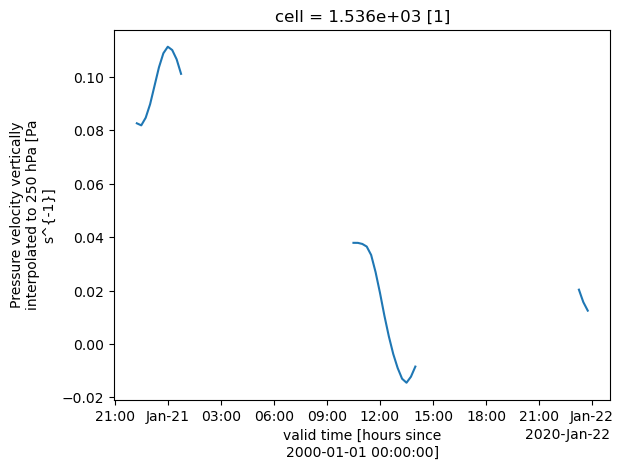

In [36]:
p = ds_rc['omega_250hPa'].isel(cell=len(ds_rc.cell)//2).compute()
print(p)
p.plot()
# p.isel(nVertLevels=0).plot()

In [8]:
# mds = xr.open_dataset("/glade/campaign/mmm/wmr/fjudt/projects/dyamond_2/3.75km/diag.2020-01-25_23.30.00.nc", decode_times=False)

# mds = xr.open_dataset("/glade/campaign/mmm/wmr/fjudt/projects/dyamond_2/3.75km/diag.2020-01-20_00.00.00.nc")

mds = xr.open_dataset("/glade/campaign/mmm/wmr/fjudt/projects/dyamond_2/3.75km/history.2020-01-22_18.00.00.nc")

In [9]:
len(mds.data_vars)

36

In [ ]:
# mds = xr.open_dataset("/glade/campaign/mmm/wmr/fjudt/projects/dyamond_1/3.75km/diag.2016-09-09_20.30.00.nc")

# mds = xr.open_dataset("/glade/campaign/mmm/wmr/fjudt/projects/dyamond_1/3.75km/history.2016-09-09_12.00.00.nc")

# xr.open_dataset("/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND1/DYAMOND1_history_to_hp2.zarr")

<xarray.Dataset> Size: 39MB
Dimensions:                 (time: 48, cell: 192, nVertLevels: 75,
                             nVertLevelsP1: 76, nSoilLevels: 4)
Coordinates:
  * time                    (time) datetime64[ns] 384B 2016-08-01 ... 2016-08...
Dimensions without coordinates: cell, nVertLevels, nVertLevelsP1, nSoilLevels
Data variables: (12/24)
    xice                    (time, cell) float32 37kB ...
    crs                     int32 4B ...
    temperature             (time, nVertLevels, cell) float32 3MB ...
    relhum                  (time, nVertLevels, cell) float32 3MB ...
    pressure                (time, nVertLevels, cell) float32 3MB ...
    qs                      (time, nVertLevels, cell) float32 3MB ...
    ...                      ...
    skintemp                (time, cell) float32 37kB ...
    qg                      (time, nVertLevels, cell) float32 3MB ...
    qc                      (time, nVertLevels, cell) float32 3MB ...
    qv                      (time, nVertLevels, cell) float32 3MB ...
    smois                   (time, nSoilLevels, cell) float32 147kB ...
    sh2o                    (time, nSoilLevels, cell) float32 147kB ...
Attributes: (12/114)
    model_name:                        mpas
    core_name:                         atmosphere
    source:                            MPAS
    Conventions:                       MPAS
    git_version:                       v6.1-dirty
    on_a_sphere:                       YES
    ...                                ...
    config_oml_relaxation_time:        864000.0
    config_sounding_interval:          none
    file_id:                           1jssg9g7bm
    NCO:                               netCDF Operators version 4.9.5 (Homepa...
    history:                           Wed Mar 24 19:39:08 2021: ncks -A -v x...
    history_of_appended_files:         Wed Mar 24 19:39:08 2021: Appended fil...

In [22]:
cnt = 0
for v in mds2.data_vars:
    if 'nVertLevels' in mds2[v].dims:
        print(v)
        cnt += 1
print(cnt)

qv
qc
qr
qi
qs
qg
nc
ni
nr
nifa
nwfa
re_cloud
re_ice
re_snow
cldfrac
15


In [2]:
# ncfil = "/glade/campaign/mmm/wmr/skamaroc/NSC_2023/3.75km_simulation_output_old_transport/DYAMOND_diag_3h.3.75km.2020-03-04_21.00.00.nc"
ncfil = "/glade/campaign/mmm/wmr/skamaroc/NSC_2023/3.75km_simulation_output_old_transport/DYAMOND_diag_1h.3.75km.2020-03-04_21.00.00.nc"
ncds = xr.open_dataset(ncfil)
print(ncds)

print(f"Number of data vars: {len(ncds.data_vars)}")

<xarray.Dataset> Size: 5GB
Dimensions:         (Time: 1, nCells: 41943042)
Dimensions without coordinates: Time, nCells
Data variables: (12/30)
    initial_time    |S64 64B ...
    xtime           (Time) |S64 64B ...
    tc_liquid       (Time, nCells) float32 168MB ...
    tc_ice          (Time, nCells) float32 168MB ...
    tc_liquid_tavg  (Time, nCells) float32 168MB ...
    tc_ice_tavg     (Time, nCells) float32 168MB ...
    ...              ...
    lwdnb_tavg      (Time, nCells) float32 168MB ...
    lwdnbc_tavg     (Time, nCells) float32 168MB ...
    swupt_tavg      (Time, nCells) float32 168MB ...
    swuptc_tavg     (Time, nCells) float32 168MB ...
    swdnt_tavg      (Time, nCells) float32 168MB ...
    swupb_tavg      (Time, nCells) float32 168MB ...
Attributes: (12/126)
    model_name:                             mpas
    core_name:                              atmosphere
    source:                                 MPAS
    Conventions:                            MPAS
    g

In [23]:
(196608 * 12 * 55) * 8

1038090240

In [21]:
393216 * 48 * 55

1038090240